### Deep learning...using the `fashion_mnist` dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [50]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

## Digitial representation of the data points 

In [6]:
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label: \n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

### Visualizing `Shape of the datapoints`

In [7]:
train_data[0].shape

(28, 28)

### Visualize random data/image

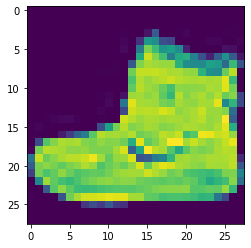

In [8]:
plt.imshow(train_data[0])

In [11]:
class_names = ["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

Text(0.5, 1.0, 'T-shirt/top')

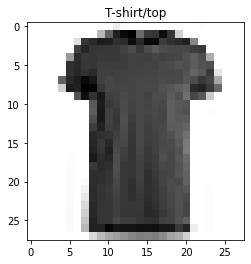

In [13]:
index = 17
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

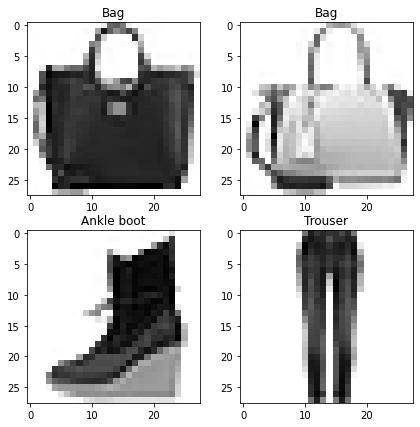

In [14]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])

# Model creation...
#### there are three steps in creating model
    1. model creation
    2. compiling the model
    3. fitting the model

In [15]:
#setting the random as usual
tf.random.set_seed(42)

#Now, creating the model...thereby introducing new parametr
multiclass_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
#Sparse CategoricalCrossentropy is used when our data is in integer format
multiclass_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])
#we can use one_hot() encoding...i.e apply one_hot encoding to the train label and avoid using this Sparse...
#one_hot(train_labels)...
multiclass_model_history = multiclass_model.fit(train_data, train_labels, epochs=10, validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 21s 4ms/step - loss: 2.1608 - accuracy: 0.1639 - val_loss: 1.7971 - val_accuracy: 0.2073
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7081 - accuracy: 0.2487 - val_loss: 1.6460 - val_accuracy: 0.2800
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6278 - accuracy: 0.2824 - val_loss: 1.6023 - val_accuracy: 0.2910
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6092 - accuracy: 0.2827 - val_loss: 1.5968 - val_accuracy: 0.2888
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5956 - accuracy: 0.2927 - val_loss: 1.5808 - val_accuracy: 0.3039
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5921 - accuracy: 0.3008 - val_loss: 1.5695 - val_accuracy: 0.3060
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5806 - accuracy: 0.3111 - val_loss: 1.5695 - val_accuracy

In [16]:
multiclass_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [17]:
train_data.min(), train_data.max()

(0, 255)

In [19]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [20]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [21]:
#Set random seed as ususal
tf.random.set_seed(42)

#Creating the model as above...

normalized_multiclass_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)
])

#Now, compiling the model...using SparseCatergoricalCrossentropy() as loss function
#since our label is in the form of integers...
normalized_multiclass_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                                   optimizer = tf.keras.optimizers.Adam(),
                                   metrics = ["accuracy"])
#fitting the model...
#this time we are going to use the normalized data

normalized_multiclass_model_history = normalized_multiclass_model.fit(train_data_norm,
                                                                      train_labels, 
                                                                      epochs = 10, 
                                                                      validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy

### Visualizing the loss curves of the normalized and non-normalized data

<AxesSubplot:title={'center':'Normalized data'}>

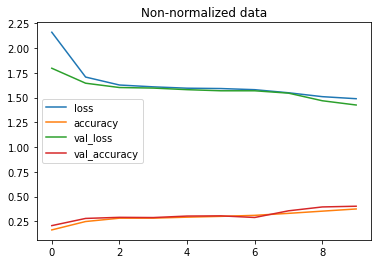

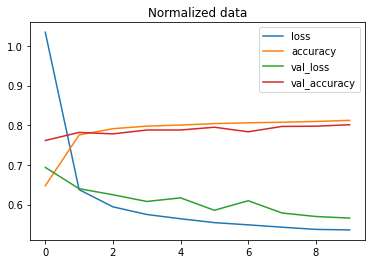

In [22]:
# plt.figure(figsize=(10,7))
# plt.subplot(1,2,1)
pd.DataFrame(multiclass_model_history.history).plot(title="Non-normalized data")
# plt.subplot(1,2,2)
pd.DataFrame(normalized_multiclass_model_history.history).plot(title="Normalized data")

### Creating another model to get an approximately `ideal learnig_rate`

In [23]:
#Setting the radom seed
tf.random.set_seed(42)

#Creating the model
normalized_multiclass_model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),   
])

#Compiling the model...
#remmebe we can use CategoricalCrossentropy as our loss fucntion...
#but we have to encode our data using one_hot encoding...

normalized_multiclass_model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                                     optimizer = tf.keras.optimizers.Adam(),
                                     metrics = ["accuracy"])

#Creatin the callback fucntion to create the callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
#fitting the model...
ideal_lr_model_history=normalized_multiclass_model_1.fit(train_data_norm,
                                                         train_labels, 
                                                         epochs = 40, validation_data = (test_data_norm, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

### The `learning_rate` decay curve

Text(0.5, 1.0, 'Finding the approximately ideal learning rate')

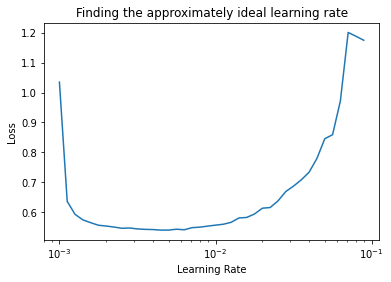

In [25]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,ideal_lr_model_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the approximately ideal learning rate")

### Model fitting using the `approximate ideal learning_rate` 

In [26]:
#Setting the radom seed
tf.random.set_seed(42)

#Creating the model
normalized_multiclass_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),   
])

#Compiling the model...
#remmebe we can use CategoricalCrossentropy as our loss fucntion...
#but we have to encode our data using one_hot encoding...

normalized_multiclass_model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                                     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                                     metrics = ["accuracy"])

#Creatin the callback fucntion to create the callback

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
#fitting the model...
ideal_lr_model_history_1=normalized_multiclass_model_2.fit(train_data_norm,
                                                         train_labels, 
                                                         epochs = 40, validation_data = (test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 16s 8ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy

### Class_names

In [28]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

 `y_pred_pros` is the predicted data
 , the following code displays the first five predictions

In [29]:
y_pred_probs = normalized_multiclass_model_2.predict(test_data_norm)
#custom_confusion_matrix
y_pred_probs[:5]

array([[1.88362229e-10, 9.28193078e-11, 1.54093559e-05, 5.43358738e-07,
        1.89942548e-05, 2.89702952e-01, 4.39308536e-08, 4.38076109e-02,
        4.27456154e-03, 6.62179887e-01],
       [1.71894317e-05, 4.02381652e-16, 9.06400681e-01, 7.54000098e-07,
        2.47777011e-02, 3.30342883e-17, 6.83545992e-02, 0.00000000e+00,
        4.49073734e-04, 1.55226157e-15],
       [4.27196355e-05, 9.98511612e-01, 1.03826032e-07, 1.42300036e-03,
        1.52413686e-05, 6.00344808e-22, 7.24059828e-06, 1.13575538e-16,
        5.22828394e-08, 5.68487922e-12],
       [4.20102842e-05, 9.96582687e-01, 7.01893271e-07, 3.23580950e-03,
        1.18159456e-04, 1.90124672e-19, 2.00167233e-05, 4.74155457e-14,
        6.13934560e-07, 1.09671494e-09],
       [1.48454547e-01, 2.43306658e-06, 1.32626653e-01, 1.02307610e-02,
        3.30896750e-02, 4.14849358e-18, 6.75096035e-01, 2.76746473e-29,
        4.99934482e-04, 1.54012325e-14]], dtype=float32)

In [30]:
y_pred_probs[0]

array([1.8836223e-10, 9.2819308e-11, 1.5409356e-05, 5.4335874e-07,
       1.8994255e-05, 2.8970295e-01, 4.3930854e-08, 4.3807611e-02,
       4.2745615e-03, 6.6217989e-01], dtype=float32)

In [32]:
tf.argmax(y_pred_probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [34]:
class_names[tf.argmax(y_pred_probs[0])]

'Ankle boot'

In [37]:
y_preds_multiclass = y_pred_probs.argmax(axis=1)

In [38]:
y_preds_multiclass[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

# Classification evaluation methods...
    1. Acuracy
    2. Precision
    3. Recall
    4. F1-score
    5. Confusion Matrix
    6. Classification report

In [46]:
from sklearn.metrics import confusion_matrix

### Define confusion matrix

In [52]:
import itertools
#creating cunfusion matrix

def custom_confusion_matrix(y_true, y_pred, classes=None,figsize=(15,15), text_size=15):
    #figsize = (10,10)
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]#normalize the confusion matrix
    n_classes = cm.shape[0]
    
    #adjusting the cunfusion matrix
    fig, ax = plt.subplots(figsize=figsize)
    #Creating a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    #create classes
    #classes = False
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    #Label the axes
    ax.set(title="Confusion Matrix",
          xlabel="Predicted Label",
          ylabel="True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)
    #Set axis label to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    #Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)
    #Set threshold for diffferent colors
    threshold = (cm.max() + cm.min())/2.
    
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100: .1f}%)",
                horizontalalignment="center",
                color="white" if cm[i,j]>threshold else "black",
                size = text_size)

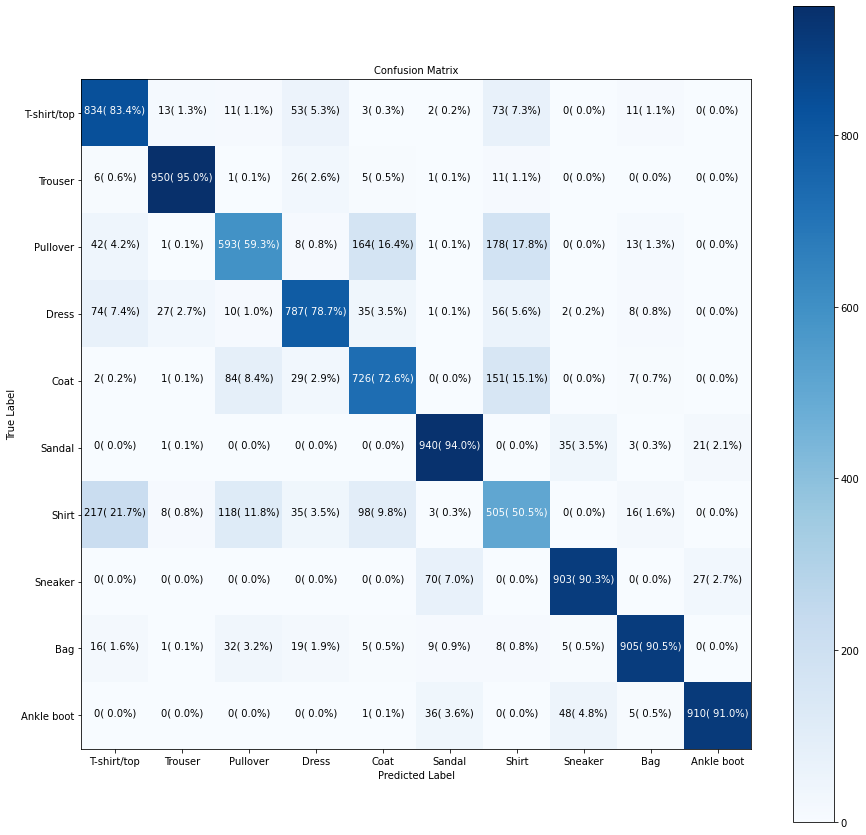

In [54]:
custom_confusion_matrix(test_labels,
                       y_preds_multiclass,
                       class_names,
                       (15,15),
                       10)

## Testing function
    . Plot random Image
    . Make a prediction on the indicated image
    . label the plot with the truth label and the predicted label

In [55]:
 def plot_random_image(model, images, truth_labels, classes):
        """
        takes random image as an input, plots it and labels it with a prediction and truth label
        """
        i = random.randint(0, len(images))
        # i is any random number between 0 and 10,000(length of the test data)
        target_image = images[i]
        #target_image is the image at that particular rnadom number
        
        pred_probs = model.predict(target_image.reshape(1,28,28))
        #pred_probs is reshaped predicted image...
        #the values that are going to stored in pred_probs are binary numbers...
        
        pred_labels = classes[pred_probs.argmax()]
        #pred_labels carry the human readable labels that we have assigned to each label above
        
        true_label = classes[truth_labels[i]]
        #true_lable is a variable that carries the actual class name
        
        plt.imshow(target_image, cmap=plt.cm.binary)
        
        if pred_labels==true_label:
            color="green"
        else:
            color="red"    
        plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_labels,
                                                        100*tf.reduce_max(pred_probs),
                                                        true_label),
                                                       color=color)

In [57]:
i = random.randint(0,len(test_data))

In [59]:
random_image = test_data[i]
#normalized_multiclass_model_2.predict()

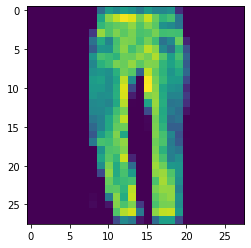

In [60]:
plt.imshow(random_image)

In [62]:
flag = normalized_multiclass_model_2.predict(random_image.reshape(1,28,28))
flag

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [63]:
flag_label = class_names[flag.argmax()]
flag_label

'Trouser'

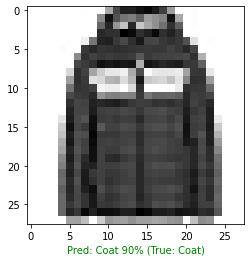

In [65]:
plot_random_image(normalized_multiclass_model_2, test_data_norm, test_labels, class_names)

### Discovering the patterns in our Models

In [66]:
normalized_multiclass_model_2.layers

In [68]:
normalized_multiclass_model_2.layers[1]

In [70]:
weights, biases = normalized_multiclass_model_2.layers[1].get_weights()
weights, weights.shape

(array([[ 1.5932971 , -0.7686993 , -1.5784495 , -1.9988159 ],
        [ 0.4566791 , -1.2957741 , -0.7322074 , -0.16243064],
        [ 1.3499516 , -0.20023166, -1.9897627 , -1.2142688 ],
        ...,
        [-0.21869247,  0.5934661 , -0.27281862,  0.4621513 ],
        [-0.21825367,  1.1962794 ,  0.5423635 , -0.5791758 ],
        [ 0.3746474 , -0.19991659,  0.02721498,  0.24650991]],
       dtype=float32),
 (784, 4))

In [72]:
biases

array([ 0.33100328, -0.01015151, -0.15789618,  1.2011395 ], dtype=float32)

## Visualizing the general structure of the model

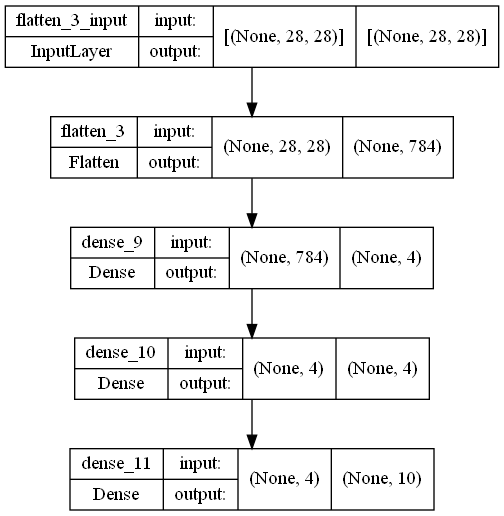

In [73]:
from tensorflow.keras.utils import plot_model
plot_model(normalized_multiclass_model_2, show_shapes=True)